# general imports

In [169]:
import os
import sys
import shutil
import scipy


import numpy as np
import xarray as xr
import pandas as pd
import PIL


In [170]:
try:
    %matplotlib widget
except:
    %matplotlib inline
    
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams['figure.constrained_layout.use'] = True

In [171]:
os.chdir('/Users/petermeshkov/Repos/pySULI/notebooks')

# setting up the example data path

In [172]:
'''
Assuming 000.read_research_data_into_python.data directory exists here with this notebook ('000.read_research_data_into_python.ipynb')
''' 

here = os.getcwd()
example_data_path = '000.read_research_data_into_python.data'

os.listdir('%s/%s'%(here,example_data_path))

['xls', 'plain_text', 'hdf', 'image', 'netcdf', 'yaml', 'npy']

# reading plain text files (txt, dat..)

In [173]:
# navigate into plain_text directory 
os.chdir('%s/%s/%s'%(here,example_data_path,'plain_text'))

# list the contents of directory
os.listdir()

['topas.xy',
 'LaB6-XRD-data-from-XPD-beamline.xy',
 'topas.inp',
 'topas.out',
 'Ni-foil-XAS-data-from-ISS-beamline.dat',
 'topas.dat',
 'Ni-foil-XAS-data-from-QAS-beamline.dat',
 'Ni_calib_20190301-150927_459ff6_0001_mean_tth.chi',
 'two-column-data.txt']

`two-column-data.txt` here is a simple two-column text file.
For someone who doesn't know python, it can be imported into excel

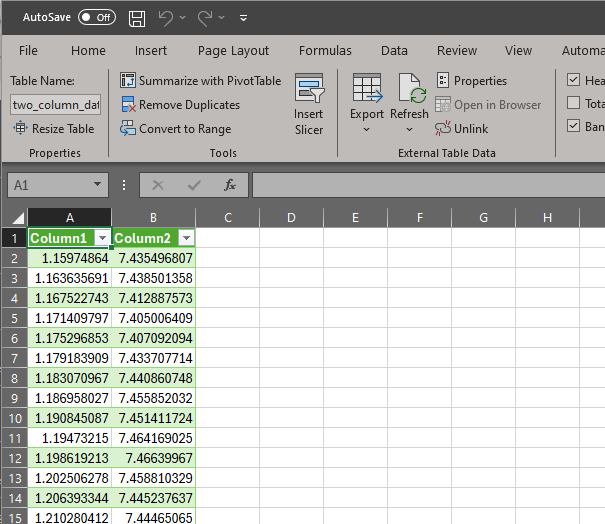

But this is very inefficient and we want "python" way of reading this file.

In python, it is only 3-lines of code to read and plot the contents of this file.

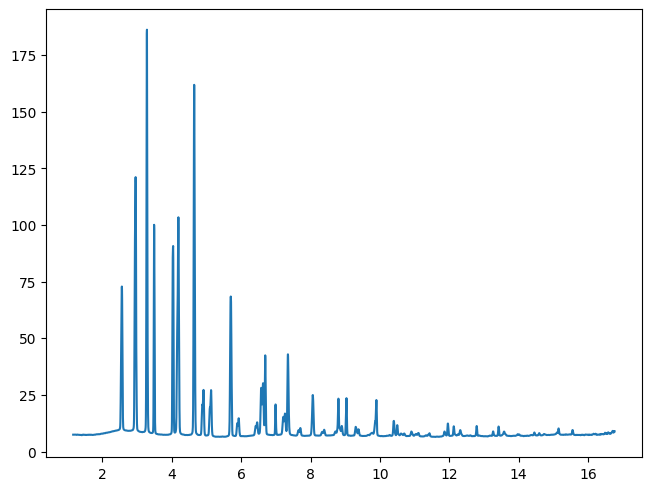

In [174]:
data = np.loadtxt('two-column-data.txt',unpack=True)
plt.figure()
plt.plot(data[0],data[1])

## how about other files here?

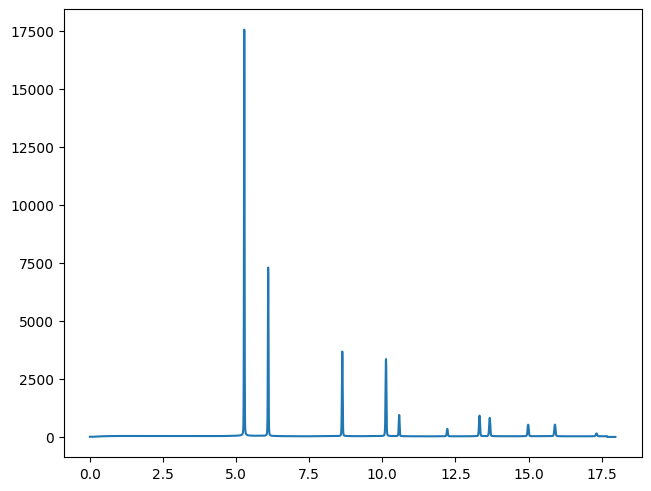

In [175]:
data = np.loadtxt('Ni_calib_20190301-150927_459ff6_0001_mean_tth.chi',unpack=True,skiprows=7)
plt.plot(data[0],data[1])

# Subplots

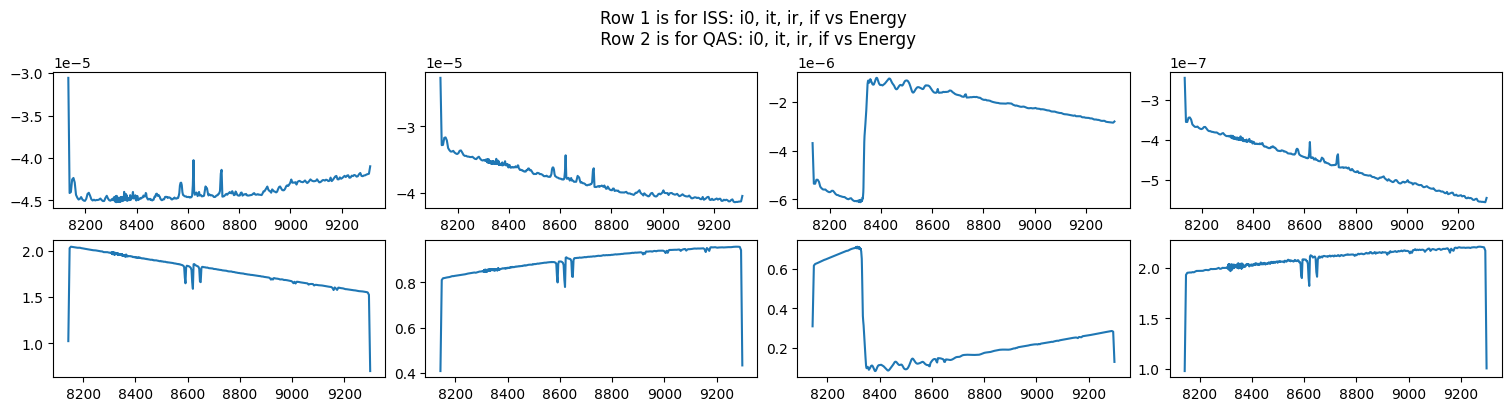

In [176]:
# load in each data set as an array
data1 = np.loadtxt('Ni-foil-XAS-data-from-ISS-beamline.dat',unpack=True)
data2 = np.loadtxt('Ni-foil-XAS-data-from-QAS-beamline.dat',unpack=True)

# create subplots with 2 rows, 4 columns
fig, [[ax1, ax2, ax3, ax4], [ax5, ax6, ax7, ax8]] = plt.subplots(2,4,figsize=(15,4))
fig.suptitle('Row 1 is for ISS: i0, it, ir, if vs Energy \n Row 2 is for QAS: i0, it, ir, if vs Energy')

# plot data from ISS
ax1.plot(data1[0],data1[1])
ax2.plot(data1[0],data1[2])
ax3.plot(data1[0],data1[3])
ax4.plot(data1[0],data1[4])

# plot data from QAS
ax5.plot(data2[0],data2[1])
ax6.plot(data2[0],data2[2])
ax7.plot(data2[0],data2[3])
ax8.plot(data2[0],data2[4])

# reading xls files into python

Text(0.5, 1.0, '25KI-LiCl-KCL_25oc')

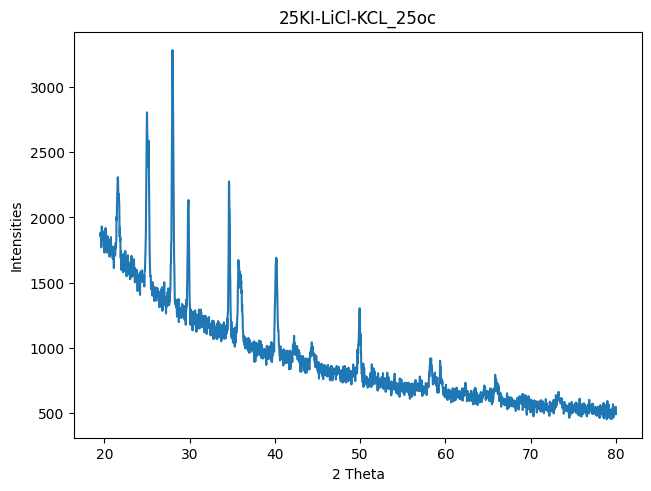

In [180]:
# navigate into xls directory 
os.chdir('%s/%s/%s'%(here,example_data_path,'xls'))

# read excel file into panda dataframe
df = pd.read_excel('25KI-LiCl-KCl_25oC.xlsx')

fig, ax = plt.subplots()
ax.plot(df["Angles"],df["Intensities"])
ax.set_xlabel("2 Theta")
ax.set_ylabel("Intensities")
ax.set_title("25KI-LiCl-KCL_25oc")



# reading image files into python

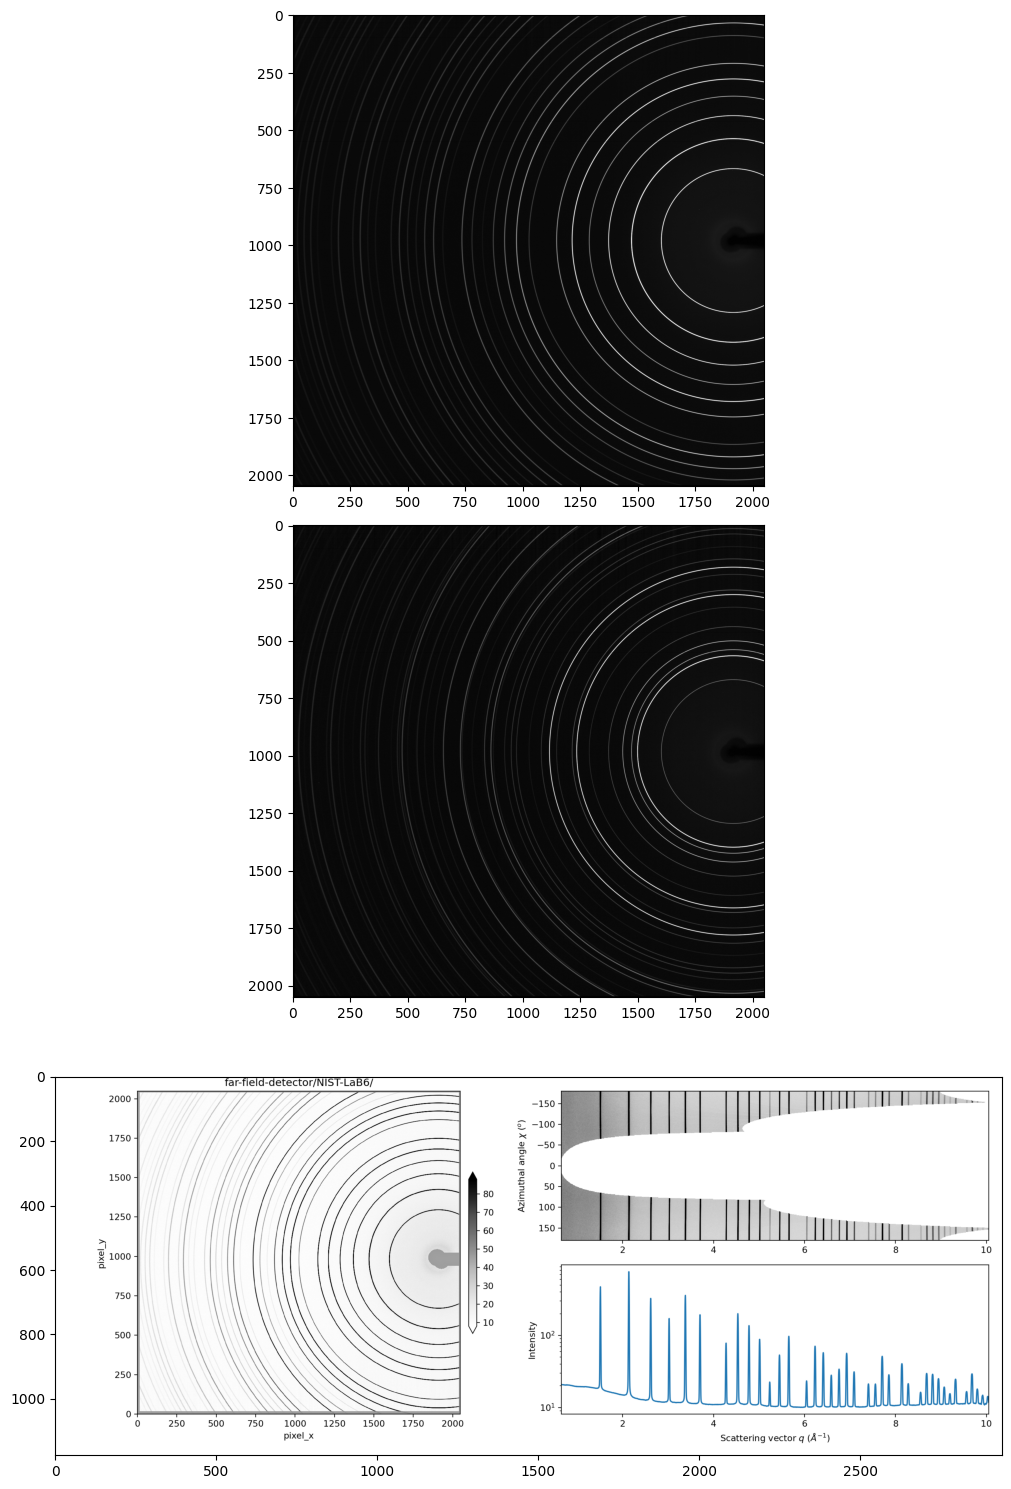

In [192]:
# navigate into image directory 
os.chdir('%s/%s/%s'%(here,example_data_path,'image'))

from PIL import Image

# aet up plot for images
fig, (ax1, ax2, ax3) = plt.subplots(3,figsize=(10,15))

# open and display image 1
im1 = Image.open('NIST-LaB6.tiff')
ax1.imshow(im1)

# open and display image 2
im2 = Image.open('NIST-LaB6-CeO2-mix.tiff')
ax2.imshow(im2)

# open and display image 3
im3 = Image.open('NIST-LaB6.png')
ax3.imshow(im3)

# reading xarray netCDF files into python

In [206]:
# navigate into netcdf directory 
os.chdir('%s/%s/%s'%(here,example_data_path,'netcdf'))

from netCDF4 import Dataset

# import netCDF file
file = Dataset('Pt-from-28ID-2-D.nc', 'w', format='NETCDF4')

PermissionError: [Errno 13] Permission denied: 'Pt-from-28ID-2-D.nc'

# reading hdf files into python

# reading numpy files (npy, npz) into python

# reading yaml into python